#                                         Business Objective

 
Build a predictive model to determine the Grade of house (The grades are A,B,C,D, and E)


### Importing required Python packages

In [1]:
import numpy as np  # for numerical data
import pandas as pd  # for Dataframes
from matplotlib import pyplot  # for visualization
import matplotlib.pyplot as plt   # for visualization

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

## Loading data file

In [9]:
house=pd.read_csv('Project2_Classification_HouseGrade_Data_Project.csv')
house.sample(5)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
187,188,343,6,3,3,4,NO,0,113,4,80,1,3910,D
1951,1952,316,8,5,5,7,NO,0,88,4,42,5,4497,C
1671,1672,356,6,4,3,4,YES,103,113,4,62,5,3812,C
374,375,335,5,4,3,4,NO,0,74,3,55,2,3111,D
1380,1381,330,6,3,2,3,YES,106,108,2,74,4,3394,D


### Data Exploration 

In [3]:
house.info()
#Above code provides us the whole information of dataset about thier datatype, memory usage columns etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


### Dimensions of the data

In [15]:
house.shape

(3000, 14)

In [12]:
house.describe().T
#We can see from the below each columns information and can get idea about the distribution of data

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


### Checking for null values

In [14]:
house.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

###### As  we can see there is no null values in our dataset if we got any null values we can impute numerical data by mean and categorical data by mode

### Visualization

<AxesSubplot:xlabel='Nbedrooms'>

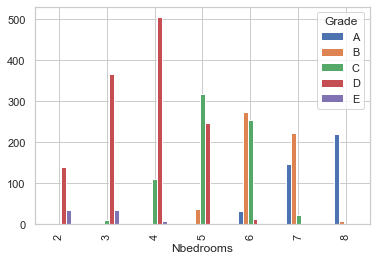

In [5]:
pd.crosstab(house['Nbedrooms'],house['Grade']).plot(kind='bar')

###### The best grade house have maximum number of bedrooms

<AxesSubplot:xlabel='Trooms'>

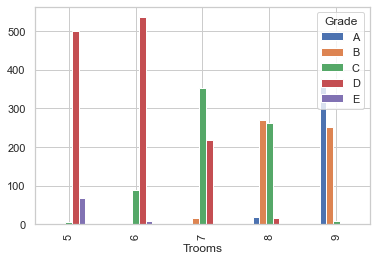

In [18]:
pd.crosstab(house['Trooms'],house['Grade']).plot(kind='bar')

###### The best grade house have maximum number of total rooms

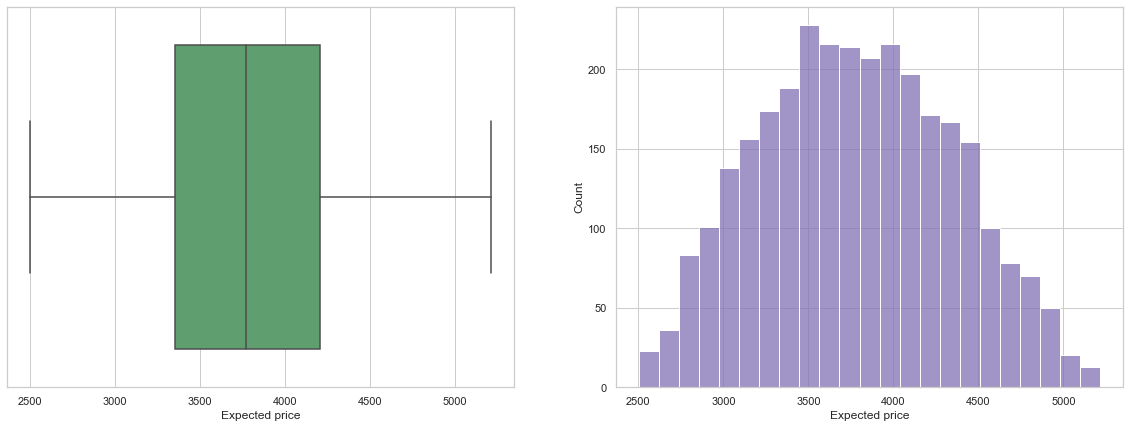

In [11]:
# Distribution of expected price of the house 
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = house["Expected price"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = house["Expected price"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

###### Price distribution for our data set is approximatly linear in nature

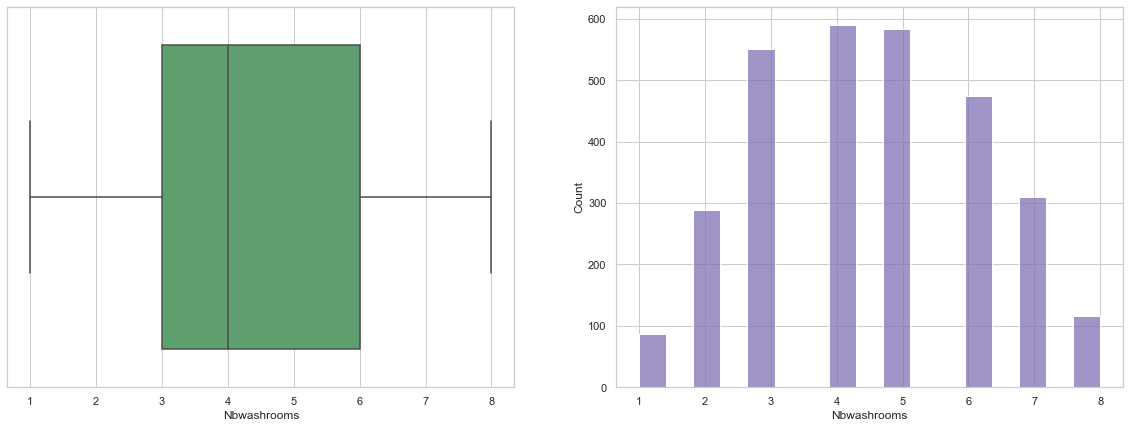

In [25]:
# Distribution of Roof(Area) of the house 
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = house["Nbwashrooms"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = house["Nbwashrooms"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

###### 75% of the data having 3-8 Nbwashrooms

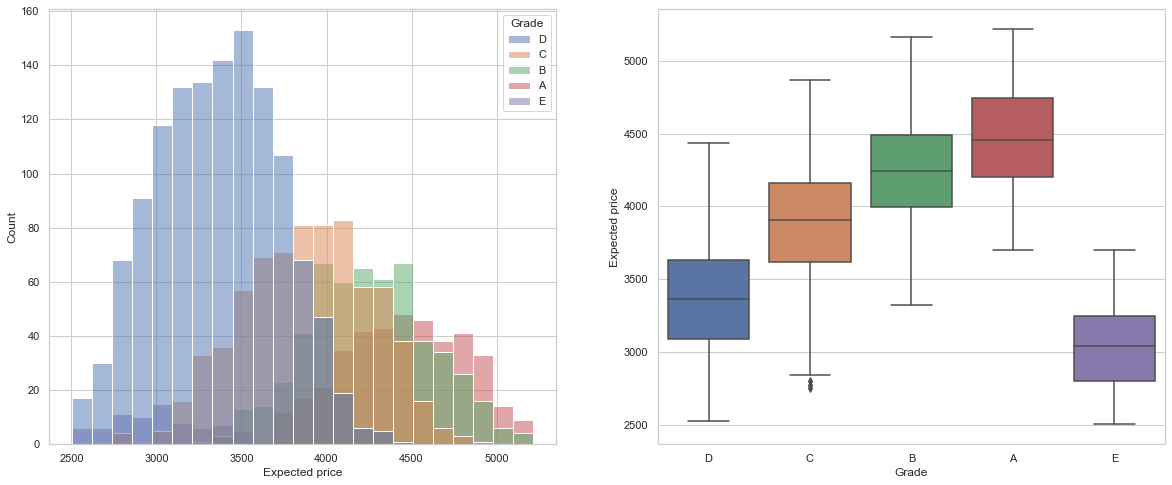

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (20,8 ))
sns.histplot(x = new_df_scaled['Expected price'], hue = new_df_scaled['Grade'], ax = ax[0])
sns.boxplot(y = new_df_scaled['Expected price'], x = new_df_scaled['Grade'], ax = ax[1])
plt.show()

##### A grade has highest expected price and 50% of grade A house varies from approximatley 4200- 4800

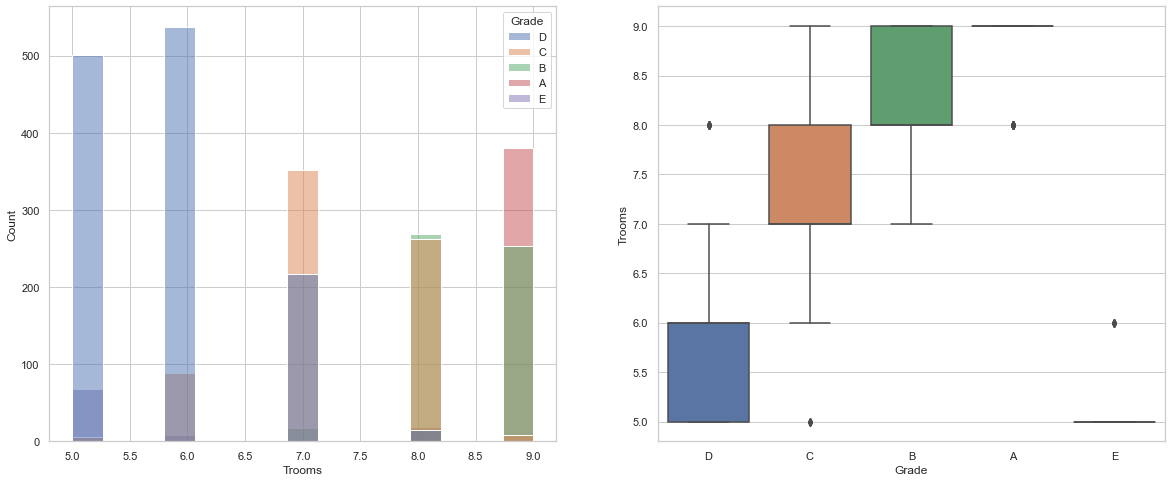

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (20,8 ))
sns.histplot(x = new_df_scaled['Trooms'], hue = new_df_scaled['Grade'], ax = ax[0])
sns.boxplot(y = new_df_scaled['Trooms'], x = new_df_scaled['Grade'], ax = ax[1])
plt.show()

###### Almost except few house have less than 9 total rooms in top Grade house

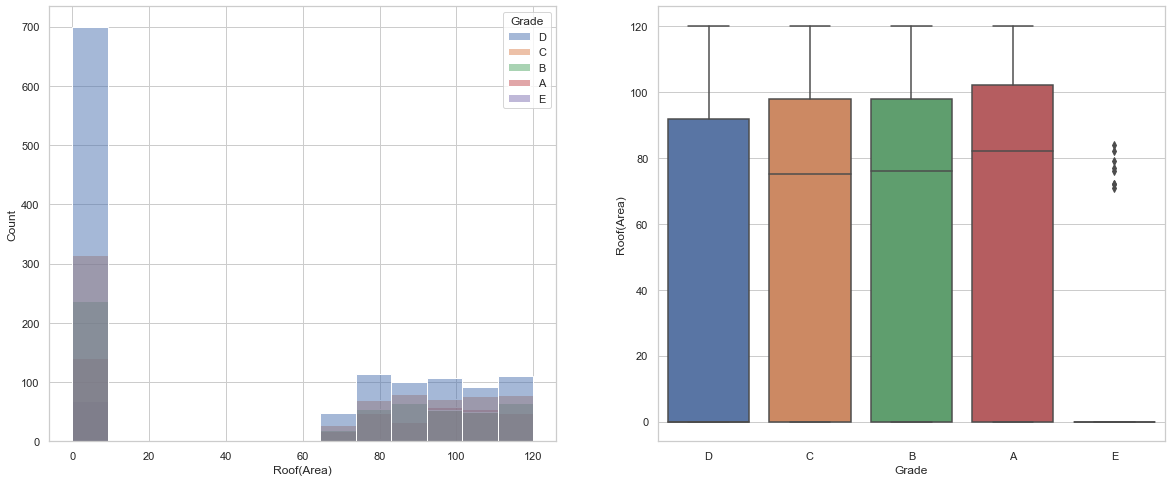

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (20,8 ))
sns.histplot(x = new_df_scaled['Roof(Area)'], hue = new_df_scaled['Grade'], ax = ax[0])
sns.boxplot(y = new_df_scaled['Roof(Area)'], x = new_df_scaled['Grade'], ax = ax[1])
plt.show()

###### 75% of total grade a house have roofs and worst grade house have no roofs or few houses have roofs with them

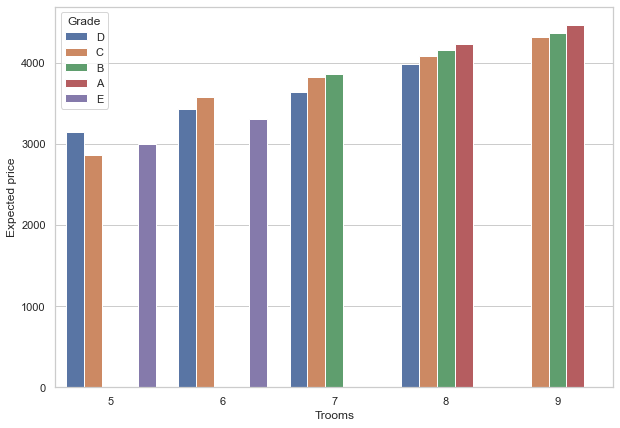

In [73]:
fig,ax= plt.subplots(figsize=(10,7))
sns.barplot(x=house['Trooms'],y=house['Expected price'],hue=house['Grade'],ci=None,ax=ax)
count=len(house['Trooms'])
plt.show()

###### Grade, Expected price and number of total rooms are directly proportional to each other

        Expected price
Trooms                
9          4424.204368
8          4125.853097
7          3754.994881
6          3451.812303
5          3123.548780
        Expected price
Trooms                
9          4424.204368
8          4125.853097
7          3754.994881
6          3451.812303
5          3123.548780
        Expected price
Trooms                
9          4424.204368
8          4125.853097
7          3754.994881
6          3451.812303
5          3123.548780


<AxesSubplot:xlabel='Expected price', ylabel='Trooms'>

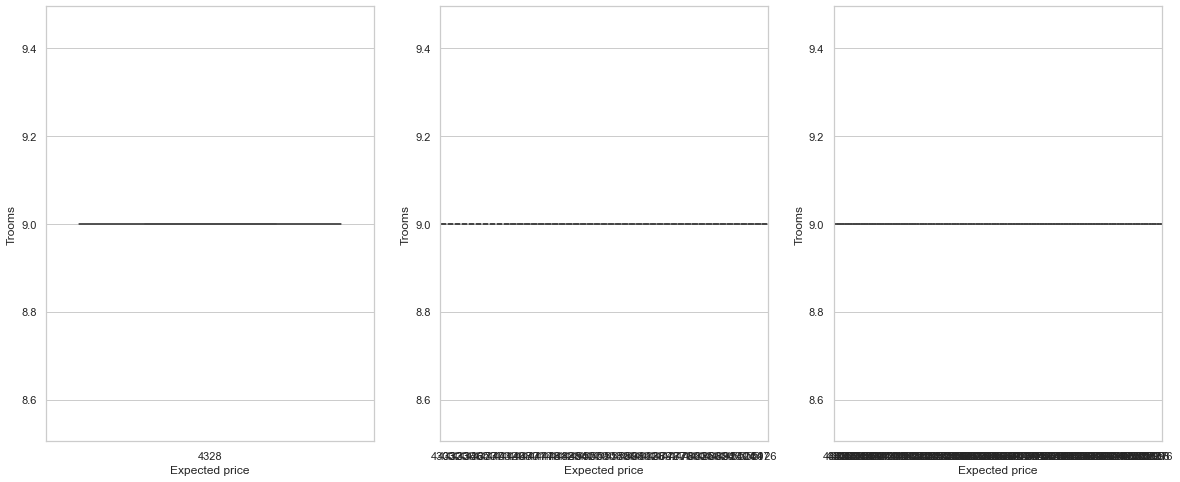

In [60]:
### filter
df3=house.loc[(house.Trooms==9)&(house.Grade=="A")&(house["Expected price"]>4300)&(house["API"]>71.0)]
df2=house.loc[(house.Trooms==9)&(house.Grade=="B")&(house['Expected price']>4300)&(house["API"]>71.0)]
df1=house.loc[(house.Trooms==9)&(house.Grade=="C")&(house['Expected price']>4300)&(house["API"]>71.0)]

# groupby
print(house[["Trooms","Expected price"]].groupby(["Trooms"]).mean().sort_values(by="Expected price", ascending= False))
print(house[["Trooms","Expected price"]].groupby(["Trooms"]).mean().sort_values(by="Expected price", ascending= False))
print(house[["Trooms","Expected price"]].groupby(["Trooms"]).mean().sort_values(by="Expected price", ascending= False))

#plot
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.boxplot(y=df1["Trooms"],x=df1["Expected price"],ax=ax[0])
sns.boxplot(y=df2["Trooms"],x=df2["Expected price"],ax=ax[1])
sns.boxplot(y=df3["Trooms"],x=df3["Expected price"],ax=ax[2])

###### checking for correlation 

In [17]:
house.corr()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598
API,-0.003739,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575


### Feature Engineering

In [20]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
house['roof_encode']= label_encoder.fit_transform(house['roof'])
 
house['roof_encode'].unique()
#print(loan_df.head())

array([0, 1])

In [21]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
house['Grade_encode']= label_encoder.fit_transform(house['Grade'])
 
house['Grade_encode'].unique()
#print(loan_df.head())

array([3, 2, 1, 0, 4])

In [23]:
house.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade', 'roof_encode', 'Grade_encode'],
      dtype='object')

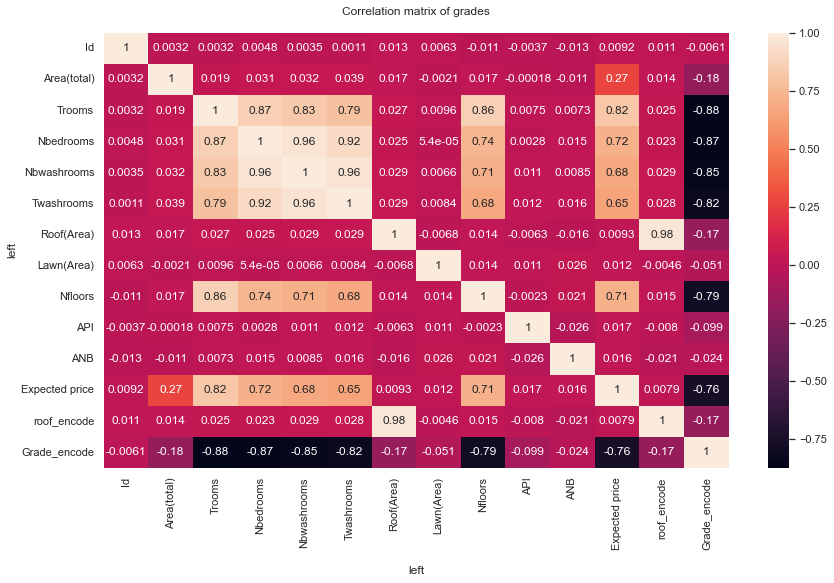

In [28]:
new_df_scaled=house[[ 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade', 'roof_encode', 'Grade_encode']]
plt.figure(figsize=(14,8))
hm = sns.heatmap(house.corr(), annot = True)
hm.set(xlabel='\nleft', ylabel='left', title = "Correlation matrix of grades\n")
plt.show()

#### Trooms, Nbedrooms, Nbwashrooms,Twashrooms,Nfloors,Expected price are highly correlated with the grades of the house

### Feature Scaling

In [86]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  new_house_df_c = new_df_scaled.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(new_house_df_c.to_numpy()),columns=new_house_df_c.columns)
  return df_scaled

In [87]:
# scaling the data using MinMax Scaling process
scale = 'minmax' #standard
house_df_scaled=feature_scale(scale)
house_df_scaled

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price
0,0.25,0.500000,0.428571,0.500,0.166667,0.360251
1,0.00,0.333333,0.285714,0.250,0.333333,0.370944
2,0.50,0.500000,0.428571,0.375,0.666667,0.458702
3,0.25,0.333333,0.285714,0.375,0.166667,0.232301
4,0.50,0.333333,0.428571,0.375,0.333333,0.493732
...,...,...,...,...,...,...
2995,1.00,0.666667,0.571429,0.625,0.666667,0.642330
2996,1.00,1.000000,0.857143,0.750,1.000000,0.460546
2997,0.50,0.333333,0.285714,0.375,0.666667,0.406711
2998,1.00,0.833333,0.857143,0.750,1.000000,0.624631


In [88]:
# Finding correlation among numerical features, based on their strong relation we can choose the important features
corr=house_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price
Trooms,1.000000,0.865878,0.827072,0.794870,0.862367,0.820170
Nbedrooms,0.865878,1.000000,0.956578,0.919158,0.742132,0.715687
Nbwashrooms,0.827072,0.956578,1.000000,0.960007,0.711936,0.683659
Twashrooms,0.794870,0.919158,0.960007,1.000000,0.684966,0.654627
Nfloors,0.862367,0.742132,0.711936,0.684966,1.000000,0.714598
Expected price,0.820170,0.715687,0.683659,0.654627,0.714598,1.000000


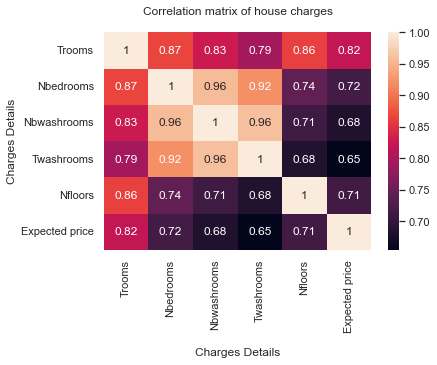

In [89]:
new_df_scaled=house_df_scaled[['Trooms', 'Nbedrooms', 'Nbwashrooms','Twashrooms','Nfloors','Expected price']]
hm = sns.heatmap(new_df_scaled.corr(), annot = True)
hm.set(xlabel='\nCharges Details', ylabel='Charges Details', title = "Correlation matrix of house charges\n")
plt.show()

In [149]:
house_df_scaled.head()

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price
0,0.25,0.500000,0.428571,0.500,0.166667,0.360251
1,0.00,0.333333,0.285714,0.250,0.333333,0.370944
2,0.50,0.500000,0.428571,0.375,0.666667,0.458702
3,0.25,0.333333,0.285714,0.375,0.166667,0.232301
4,0.50,0.333333,0.428571,0.375,0.333333,0.493732


### Splitting data

In [97]:
X=house_df_scaled
y=house['Grade_encode']


In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.2,random_state=2)

### Logistic Regression

In [102]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)
#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.75

In [150]:
df=pd.DataFrame({"Actual value":Y_test,"Predicted Value":Y_pred})
df.head()

,Actual value,Predicted Value
1291,3,3
595,2,2
236,1,1
2824,2,1
1290,1,0


In [109]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred).ravel()

[[ 79  13   0   0   0]
 [  8  89  12   0   0]
 [  0  16  89  23   0]
 [  0   0  15 244   0]
 [  0   0   0  12   0]]


In [113]:
 from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred,average='weighted'))
print('f1-score:', f1_score(Y_test, Y_pred,average='weighted'))
print('precision:', precision_score(Y_test, Y_pred,average='weighted'))

accuracy: 0.835
recall: 0.835
f1-score: 0.8249741445990811
precision: 0.8174465856950632


### Modeling - Naïve Bayes

In [134]:
from sklearn.naive_bayes import GaussianNB
# Fitting Naive Bayes to the Training set  
NB_model=GaussianNB()
NB_model.fit(X_train,Y_train)

GaussianNB()

In [135]:
# Predicting the Test set results  
y_pred=NB_model.predict(X_test)


In [154]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(Y_test,y_pred)
cm2

array([[ 48,  44,   0,   0,   0],
       [  1,  99,   9,   0,   0],
       [  0,  28,  66,  34,   0],
       [  0,   0,  11, 248,   0],
       [  0,   0,   0,  12,   0]], dtype=int64)

In [155]:
# Evaluate Accuracy Score
accuracy_score(Y_test, y_pred)


0.7683333333333333

In [156]:
# Predicting the train set results  
y_pred_train=NB_model.predict(X_train)
y_pred_train

array([2, 3, 2, ..., 1, 2, 3])

In [157]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_train,y_pred_train)
cm1

array([[257,  50,   0,   0,   0],
       [ 42, 347,  41,   0,   0],
       [  0,  88, 421,  79,   0],
       [  0,   0, 150, 691, 170],
       [  0,   0,   0,  20,  44]], dtype=int64)

In [158]:
# Evaluate Accuracy Score
accuracy_score(Y_train, y_pred_train)


0.7333333333333333

### Modeling - Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [162]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [163]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(Y_test,y_pred)
cm3

array([[ 48,  44,   0,   0,   0],
       [  1,  99,   9,   0,   0],
       [  0,  28,  66,  34,   0],
       [  0,   0,  11, 248,   0],
       [  0,   0,   0,  12,   0]], dtype=int64)

In [164]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.7683333333333333


In [165]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(Y_train,y_pred_train)
cm4

array([[257,  50,   0,   0,   0],
       [ 42, 347,  41,   0,   0],
       [  0,  88, 421,  79,   0],
       [  0,   0, 150, 691, 170],
       [  0,   0,   0,  20,  44]], dtype=int64)

In [166]:
y_pred_train = clf.predict(X_train)
y_pred_train

array([3, 3, 3, ..., 1, 2, 3])

In [167]:
print("Accuracy:",metrics.accuracy_score(Y_train, y_pred_train))

Accuracy: 0.7508333333333334


## Conclusion:
    

### As we build three models( logestic regression, Navies bayes and Decision Tree classifer) all model gives approximatly same prediction values as the model

#### 
- Accuracy for logestic regression: 79.75%
- Accuracy for  Navies bayes model : 73.33%
- Accuracy for  Decision Tree classifer: 75.08%
    - So we can go for Logistic Regression model